In [1]:
import numpy as np
import util
from SoftmaxRegression import SoftmaxRegression

## 1. Data Loading 

In [2]:
classification_train_data = util.load_data("classification_train_data.pkl")
classification_train_label = util.load_data("classification_train_label.pkl")

## 2. Data Exploration

In [3]:
print("Classification Train Data Shape:", classification_train_data.shape)
print("Classification Train Label Shape:", classification_train_label.shape)

Classification Train Data Shape: (49976, 257)
Classification Train Label Shape: (49976, 2)


## 3. Data Preprocessing

In [4]:
# remove index column
train_data_index = classification_train_data[:, 0]
train_label_index = classification_train_label[:, 0]
classification_train_data = classification_train_data[:, 1:]
classification_train_label = classification_train_label[:, 1:].reshape(-1)

In [5]:
classification_train_data.shape, classification_train_label.shape

((49976, 256), (49976,))

In [6]:
train_data_index.shape, train_label_index.shape

((49976,), (49976,))

In [7]:
# normalization

# calculate the mean and standard deviation of each column
mean = np.mean(classification_train_data, axis=0)
std_dev = np.std(classification_train_data, axis=0)

# Z-Score normalizes each column
classification_train_data = (classification_train_data - mean) / std_dev

In [8]:
# label one-hot encoding
num_classes =  10 
classification_train_label = np.eye(num_classes)[classification_train_label]
print("train label shape:", classification_train_label.shape)

train label shape: (49976, 10)


## 4. Dataset Splitting

In [9]:
# divide the data set into training set and validation set
train_ratio = 0.8
seed = 114514
(train_data, train_labels), (validation_data, validation_labels) = util.split_train_validation(
    classification_train_data, classification_train_label,
    train_ratio=train_ratio, random_seed=seed
)

In [10]:
train_data.shape, train_labels.shape, validation_data.shape, validation_labels.shape

((39980, 256), (39980, 10), (9996, 256), (9996, 10))

# 5. Model

In [37]:
linear_model = SoftmaxRegression(
    num_classes=num_classes,
    learning_rate=0.05,
    num_iterations=17000,
    random_seed=seed)

## 6. Train 

In [38]:
train_losses, val_losses, train_accuracies, val_accuracies = linear_model.fit(
    X_train=train_data, y_train=train_labels, 
    X_val=validation_data, y_val=validation_labels
    )

100%|██████████| 17000/17000 [05:55<00:00, 47.79it/s]


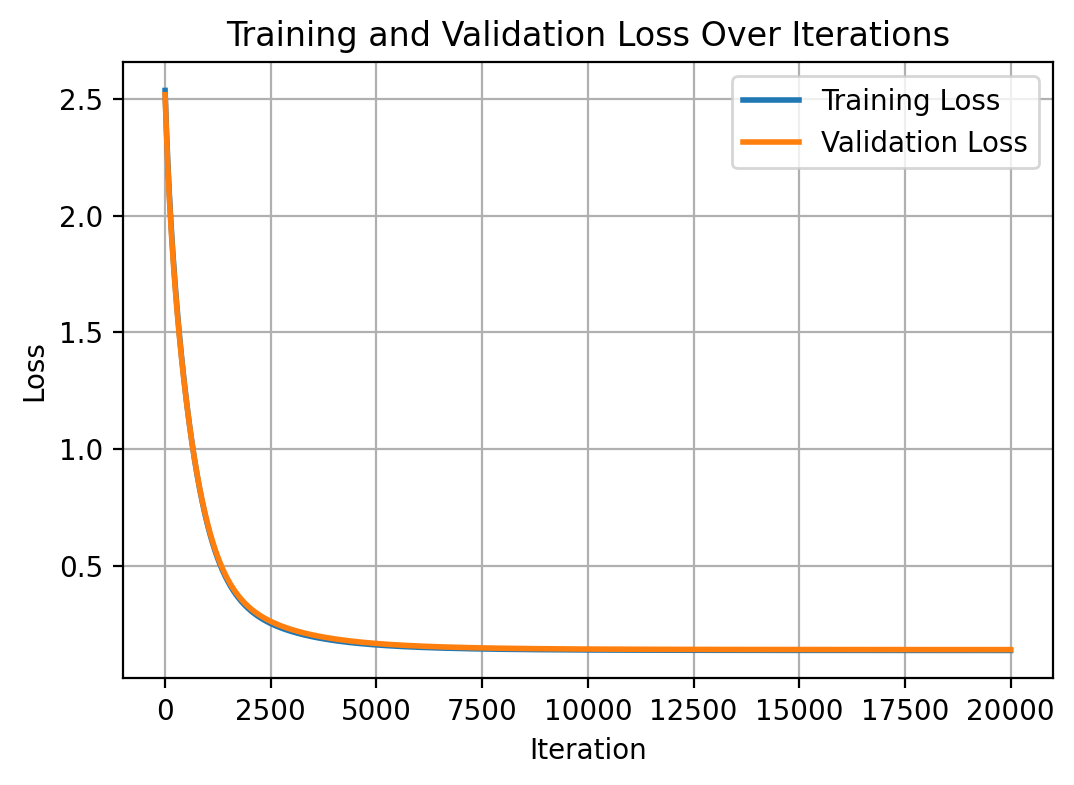

In [35]:
util.plot_loss_curves(train_losses=train_losses, val_losses=val_losses)

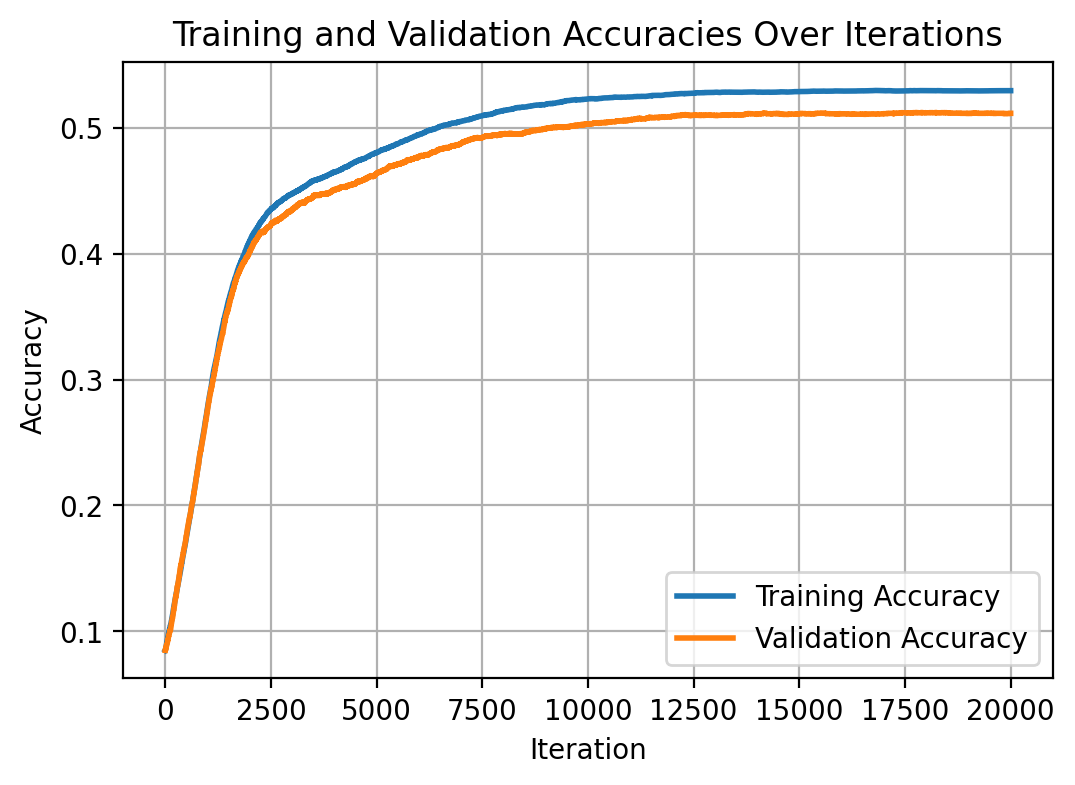

In [36]:
util.plot_acc_curves(train_acc=train_accuracies, val_acc=val_accuracies)

## 7. Predict

In [28]:
util.save_data('./classification_model.pkl', linear_model)
util.save_data('./classification_mean.pkl', mean)
util.save_data('./classification_std.pkl', std_dev)

Saved successfully
Saved successfully
Saved successfully
